In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from ast import literal_eval
import osmnx as ox

from shapely.geometry import Polygon

In [23]:
# reading road construction polygons
road_construction = pd.read_csv('data/hungary_road_construction.csv',sep=";",index_col=None,header=None)
road_construction.columns = ["name","year","month","day","points"]
road_construction.head()


,name,year,month,day,points
0,Polgári Tisza-hid,2002,10.0,1.0,"[[21.0552074392,47.8535623743],[21.0510017355,..."
1,Szekszard Szent Laszlo-hid,2003,7.0,4.0,"[[18.8875748594,46.3498790197],[18.887274452,4..."
2,Dunaujvaros Pentele-hid,2007,7.0,23.0,"[[18.9884702044,46.8892504416],[18.9010945635,..."
3,M3 Fuzesabony-Polgar,2002,NaN,NaN,"[[20.4282135249,47.7251911319],[20.4055542231,..."
4,M3 Polgar-Gorbehaza,2004,9.0,NaN,"[[21.2596564086,47.7818136227],[21.1813788207,..."


<AxesSubplot:>

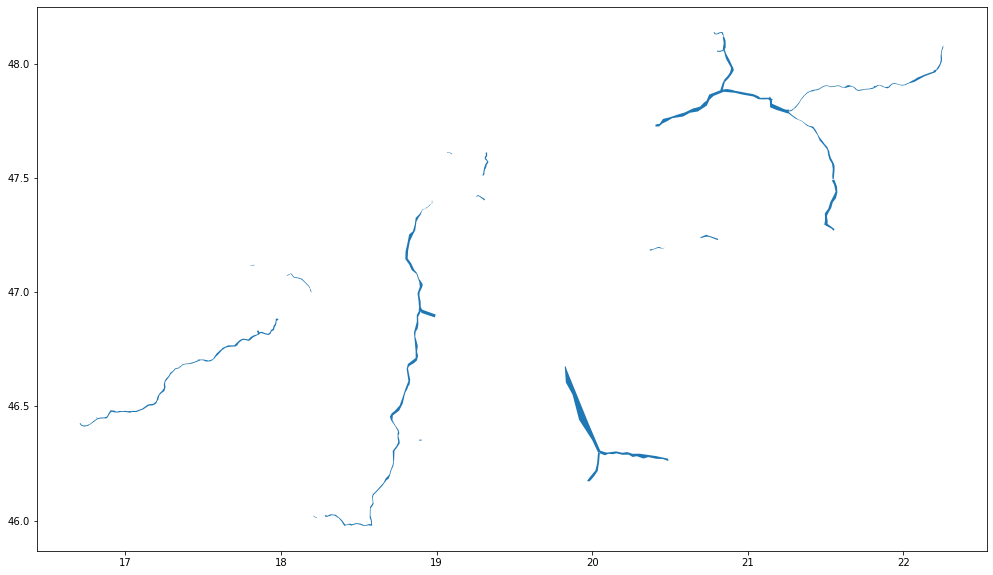

In [24]:
# converting list of list strings to actual Python objects
road_construction["points"] = road_construction["points"].map(literal_eval)
# converting list of lists to Polygon objects
road_construction["geometry"] = road_construction["points"].map(Polygon)
# converting pandas to geodataframe
road_construction = gpd.GeoDataFrame(road_construction, geometry = "geometry", crs = "epsg:4326")
fig,ax = plt.subplots(1,1,figsize=(20,10))
road_construction.plot(ax=ax)

In [25]:
nodes_s = gpd.read_file("data/hungary_main_roads_nodes.shp")
edges_s = gpd.read_file("data/hungary_main_roads_edges.shp")

In [36]:
intersections = gpd.sjoin(edges_s, road_construction)
intersections.head()

,u,v,key,length,maxspeed_n,geometry,index_right,name,year,month,day,points
79,686550313,2144826801,0,3998.054,90.000000,"LINESTRING (18.27575 46.05365, 18.27524 46.052...",16,M6 Dunaujvaros-Pecs,2010,3.0,31.0,"[[18.5332377694, 45.9757037252], [18.506115271..."
85,686550337,688358294,0,26414.185,84.767127,"LINESTRING (18.27652 46.05478, 18.27674 46.054...",16,M6 Dunaujvaros-Pecs,2010,3.0,31.0,"[[18.5332377694, 45.9757037252], [18.506115271..."
90,686550399,2144826788,0,304.186,90.000000,"LINESTRING (18.28787 46.01851, 18.28749 46.019...",16,M6 Dunaujvaros-Pecs,2010,3.0,31.0,"[[18.5332377694, 45.9757037252], [18.506115271..."
91,686550399,2144826756,0,47.231,90.000000,"LINESTRING (18.28787 46.01851, 18.28788 46.018...",16,M6 Dunaujvaros-Pecs,2010,3.0,31.0,"[[18.5332377694, 45.9757037252], [18.506115271..."
95,687431058,687433176,0,4157.165,125.888139,"LINESTRING (18.23613 46.01250, 18.23791 46.012...",16,M6 Dunaujvaros-Pecs,2010,3.0,31.0,"[[18.5332377694, 45.9757037252], [18.506115271..."


In [41]:
!pwd

/home/bokanyie/projects/wwcs-2022-memory-of-social-connections/simplified_roads/hungary


<AxesSubplot:>

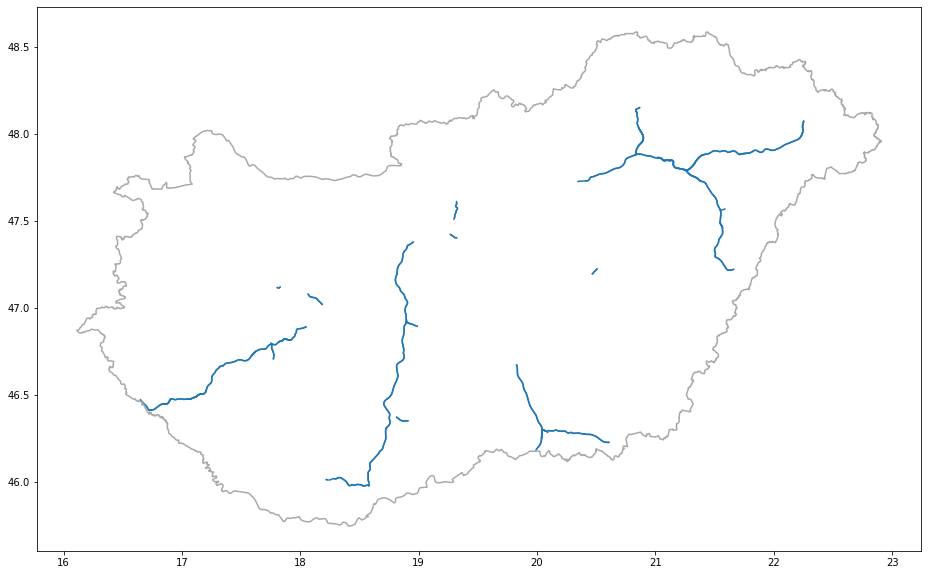

In [44]:

fig,ax = plt.subplots(1,1,figsize=(20,10))
intersections[intersections["maxspeed_n"]>90].plot(ax=ax)
gpd.read_file('../../data/hungary-gadm/gadm36_HUN_0.shp').boundary.plot(ax=ax,color='darkgrey')